In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

# Creates the necessary datasets for analysis
* Writes them to a folder in M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed
* (1) Writes a csv of all events joined to descriptive categories
* (2) Writes a csv of all events with descriptive categories joined to location
* (3) Writes a csv of all events with descriptive categories and locations joined to event organizers
* Neighborhood specific csvs: Long Island City, Bushwick, and Bay Street.

In [3]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Events Listing\190513_download'
process_path= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed'

In [4]:
event= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Listing.csv'))
orgs= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Organizers.csv'))
loc= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Locations.csv'))
cats= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Categories.csv'))

In [5]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [6]:
cd= gpd.read_file(r"S:\NYC_GIS_DATA\City Council Districts\City Council Districts\geo_export_c4785880-ab1e-47c2-92a7-0b7db23eb8f0.shp")

In [7]:
events= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Mapped Events\park_events_190514_alldata.shp")

In [8]:
pd.merge(event,cats,on='event_id',how='left')['event_id'].unique().shape

(74880,)

* Creates a csv of events joined to all possible event descriptions

In [11]:
eventcats= pd.merge(event,cats,on='event_id',how='left')

In [13]:
eventcats.rename(columns={'name':'category'},inplace=True)

In [14]:
eventcats.to_csv(join(process_path,'eventcats.csv'))

In [15]:
pd.merge(eventcats,loc,on='event_id',how='left').shape

(222679, 24)

In [16]:
eventloc= pd.merge(eventcats,loc,on='event_id',how='left')

In [19]:
eventloc['event_id'].unique().shape

(74880,)

In [35]:
eventloc.rename(columns={'name':'Location Name'},inplace=True)

* Creates a csv of all events with all descriptive categories joined to the event location.

In [36]:
eventloc.to_csv(join(process_path,'eventloc.csv'))

In [37]:
eventorg= pd.merge(eventloc,orgs,on='event_id',how='left')

In [38]:
eventorg['event_organizer'].head()

0    Central Park Conservancy
1          Poe Visitor Center
2          Poe Visitor Center
3          Poe Visitor Center
4          Poe Visitor Center
Name: event_organizer, dtype: object

In [39]:
eventorg.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,category,Location Name,park_id,lat,long,address,zip,borough,accessible,event_organizer
0,76690,Open Hours: Hallett Nature Sanctuary,10/29/2013,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,Nature,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0,Central Park Conservancy
1,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Arts & Crafts,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center
2,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Best for Kids,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center
3,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Historic House Trust Sites,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center
4,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Poe Park Visitor Center,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center


In [40]:
eventorg.shape

(252788, 25)

* Creates a csv of all events (with descriptive categories and event locations) joined to the event organizer

In [41]:
eventorg.to_csv(join(process_path,'eventorg.csv'))

In [42]:
eventorg['event_id'].unique().shape

(74880,)

# Neighborhood specific csvs
* Long Island City

In [55]:
lic= parks[parks['COUNCILDIS']=='26']

In [88]:
lic[['SIGNNAME','LOCATION']].sort_values('LOCATION')

,SIGNNAME,LOCATION
1228,Gordon Triangle,"10 St., Vernon Blvd. bet. 44 Rd. and 45 Ave."
275,Ravenswood Playground,21 St. bet. 34 Ave. and 35 Ave.
415,Dutch Kills Playground,"28 St., Crescent St. bet. 37 Ave. and 36 Ave."
273,Playground Thirty Five XXXV,35 Ave. bet. Steinway St. and 41 St.
43,A.R.R.O.W. Field House,35th St. bet. 35 Ave. and 36 Ave.
583,Spirit Playground,36 Ave bet. 9 St. and 10 St.
923,Sixteen Oaks Grove,"37 Ave., 14 St., 21 St."
757,Latham Park,"43 Ave. bet. 66 St. and 67 St., BQE"
1058,Park,43 Ave. bet. BQE and 68 St.
1260,John Vincent Daniels Jr. Square,"43 Ave., Roosevelt Ave. bet. 50 St., 51 St. an..."


In [90]:
lic= lic.drop([268,757,1058,1260,1015,2,1019,1059,685,728,1027,1238,1240,1287,1060,1404,1028,1295,639,1238,1017,1061],axis=0)

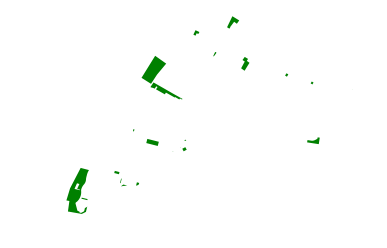

In [91]:
lic.plot(color='green')
plt.axis('off');

In [92]:
cd = cd.to_crs({'init': 'epsg:2263'})

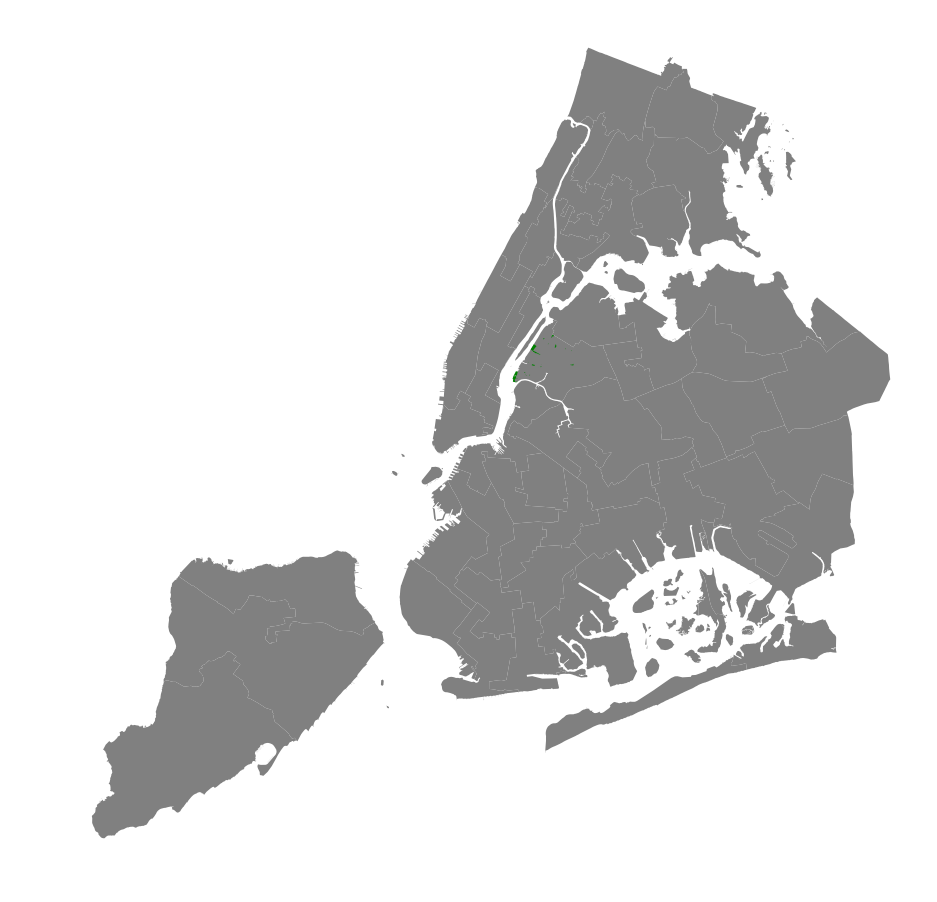

In [93]:
#Double checking that Long Island City parks are correctly located.
fig, ax = plt.subplots(1, figsize=(16,16))
base = cd.plot(ax=ax, color='gray')
lic.plot(ax=ax, color='green', markersize=4)
plt.axis('off')
plt.show();

In [94]:
lic.to_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Neighborhood Specific Parks\lic.shp")

* Bushwick

In [96]:
bushwick= parks[parks['COMMUNITYB']=='304']

* Bay Street

In [97]:
bay= parks[parks['COMMUNITYB']=='501']

# To create a shapefile of parks with amenities
* On hold/not completed

In [98]:
pools= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\Pools\geo_export_d4acf45e-cdd8-41c5-b638-ac348f378574.shp")

In [106]:
pools['GISPROPNUM']=pools['gispropnum']

In [107]:
temp= pd.merge(parks,pools,on='GISPROPNUM',how='left')

In [108]:
pools.shape

(102, 11)

In [109]:
temp.shape

(1746, 26)

In [111]:
temp.rename(columns={'name':'pools'},inplace=True) #Merged dataset

In [112]:
nature= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\Forever Wild Preserves and Natural Areas\geo_export_b0e680a6-bd79-4f75-b167-a0e1db233a7f.shp")

In [113]:
skate= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\Skateparks\geo_export_287272a1-1c0c-42a6-a1cf-a3f63c38f808.shp")

In [ ]:
play= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\Play Areas\geo_export_070dc7e9-69c2-4544-a2c2-97e209e5cc96.shp")

In [114]:
temp['gispropnum']=temp['GISPROPNUM']

In [115]:
pd.merge(temp,skate,on='gispropnum',how='left')

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,...,features_2,features_3,inline_ska,name,park_surfa,scooter_pe,shape_area,shape_len,system,geometry
0,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...","401, 402",26,114,11101,Q,20.340,40-50 VERNON BOULEVARD,Queensbridge Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X253,City Island Ave bet. Centre St. and Winter St.,210,13,45,10464,X,6.100,200 CITY ISLAND AV,Ambrosini Field,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,401,26,114,11106,Q,6.280,31-30 VERNON BOULEVARD,Socrates Sculpture Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B379,Bay View Ave. between Sea Gate Ave. and W. 33 St.,313,47,60,11224,B,8.892,3871 POLAR STREET,Coney Island Creek Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B385,West St. bet. Kent St. and Greenpoint Ave.,301,33,94,11222,B,6.611,2 KENT STREET,WNYC Transmitter Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,B129,"Neptune Ave., Bayview Ave.,W. 24 St. to W. 32 St.",313,47,60,11224,B,26.257,2529 NEPTUNE AVENUE,Kaiser Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,B126,"Halleck St., Bush St. bet. Otsego St. and Cour...",306,38,76,11231,B,58.503,825 HENRY STREET,Red Hook Recreation Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,M290,FDR Dr. at E. 107 St.,111,8,23,10029,M,0.356,500 - 501 E. 107 Street,Pier 107 CVII,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,R008,"Richmond Ter. To Kill Van Kull, Faber St.",501,49,120,10302,R,4.339,2175 RICHMOND TERRACE,Faber Pool and Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,R046,"Ft. Wadsworth To Miller Field, Fr Capodanno Blvd.",502,50,122,"10305, 10306",R,644.350,280 FR CAPODANNO BLVD,Franklin D. Roosevelt Boardwalk and Beach,...,Quarter Pipe,Bowl/Pool,Y,Ben Soto Skatepark,Concrete,Y,17054.750226,574.277923,R046-07-SKATEPARK-01,POLYGON ((-74.08426458776971 40.57475950385479...


In [117]:
temp2= pd.merge(temp,pd.merge(temp,skate,on='gispropnum',how='left').groupby('gispropnum')[['name']].count().reset_index(),on='gispropnum',how='left')

In [118]:
temp2.rename(columns={'name':'skateparks'},inplace=True)

In [119]:
nature['gispropnum']=nature['park_id']

In [120]:
temp3= pd.merge(temp2,pd.merge(temp2,nature,on='gispropnum',how='left').groupby('gispropnum')[['parkname']].count(),on='gispropnum',how='left')

In [121]:
temp3.rename(columns={'parkname':'naturearea'},inplace=True)

* Reading all relevant CSVs

In [122]:
ice= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_IceSkating_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Ice'})

In [123]:
beach= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Beaches_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Beach'})

In [124]:
bocce= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Bocce_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Bocce'})

In [125]:
concess= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Concessions_001.csv",index_col='park_id',usecols=['park_id','name']).rename(columns={'name':'Concess'})

In [126]:
dogrun= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_DogRuns_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'DogRun'})

In [128]:
hand= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Handball_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Handball'})

In [129]:
naturecen= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_NatureCenters_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Nature'})

In [130]:
playg= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Playgrounds_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Playground'})

In [131]:
histh= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_HistoricHouses_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Histh'})

In [132]:
crick= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Cricket_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Cricket'})

In [133]:
zoo= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Zoos_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Zoos'})

In [134]:
basketb= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Basketball_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Basketb'})

In [135]:
barb= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\DPR_Barbecue_001.csv",index_col='Prop_ID',usecols=['Prop_ID','Name']).rename(columns={'Name':'Barb'})

In [136]:
trails= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\Parks_Trails.csv",index_col='ParkID',usecols=['ParkID','Trail_Name']).rename(columns={'Trail_Name':'Trail'})

In [137]:
pd.concat([ice,beach,concess,trails,barb,basketb,zoo,crick,histh,playg,naturecen,hand,dogrun],axis=0,join='outer',sort=True)

,Barb,Basketb,Beach,Concess,Cricket,DogRun,Handball,Histh,Ice,Nature,Playground,Trail,Zoos
B169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abe Stark Rink,NaN,NaN,NaN,NaN
B073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LeFrak Center at Lakeside,NaN,NaN,NaN,NaN
M008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Rink at Bryant Park,NaN,NaN,NaN,NaN
M010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lasker Rink,NaN,NaN,NaN,NaN
M010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wollman Rink,NaN,NaN,NaN,NaN
R005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WWII Veterans War Memorial Ice Skating Rink,NaN,NaN,NaN,NaN
Q099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World Ice Arena,NaN,NaN,NaN,NaN
X039,NaN,NaN,Orchard Beach and Promenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B251,NaN,NaN,Manhattan Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B169,NaN,NaN,Coney Island and Coney Island Boardwalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
